## Visualizing Earnings Based On College Majors

In this project, we will be working with a dataset on the jon outcomes of students who graduated from college between 2010 and 2012. 

### The Dataset

The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. The cleaned dataset can be found [here](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Some of the columns in the dataset are as follows:


* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.


### 1. Import libraries and open the dataset

In [1]:
import matplotlib as plt
import pandas as pd


recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [2]:
cleaned_data_count = recent_grads.shape
print("Dimensionality of the dataset : ",cleaned_data_count)
recent_grads.head()


Dimensionality of the dataset :  (173, 21)


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.tail()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


Now let's view the statistical summary of all the numeric columns.
First drop all rows with missing values.

In [4]:
recent_grads = recent_grads.dropna()
recent_grads.describe()


,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [5]:
print("Dimensionality of the dataset after removing missing values: ",recent_grads.shape)

Dimensionality of the dataset after removing missing values:  (172, 21)


There are 172 rows in the dataset after removing the missing values. Assign it to a variable.

In [6]:
raw_data_count = 172

### 2. Visualizing and exploring data - Scatter Plot

We are going to visualize the data and generate scatter plots to explore the dataset further.

#### Relation between `Sample_size` and `Median`


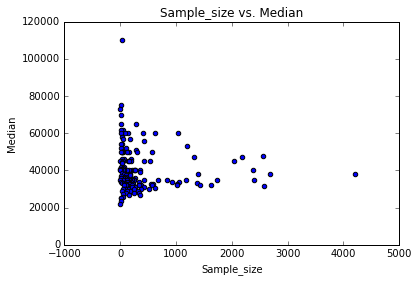

In [7]:
%matplotlib inline

recent_grads.plot(x='Sample_size',y="Median", kind="scatter", title="Sample_size vs. Median")

#### Relation between `Sample_size` and `Unemployment_rate`

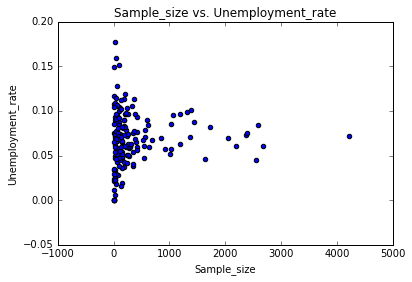

In [8]:

recent_grads.plot(x='Sample_size',y="Unemployment_rate", kind="scatter", title="Sample_size vs. Unemployment_rate")


#### Relation between `Full_time` and `Median`

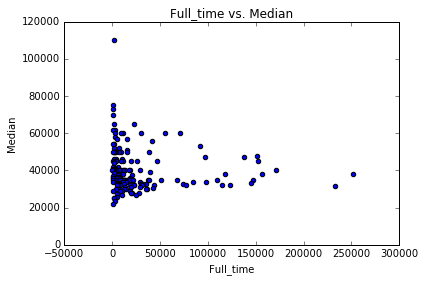

In [9]:

recent_grads.plot(x='Full_time',y="Median", kind="scatter", title="Full_time vs. Median")

#### Relation between `ShareWomen` and `Unemployment_rate`

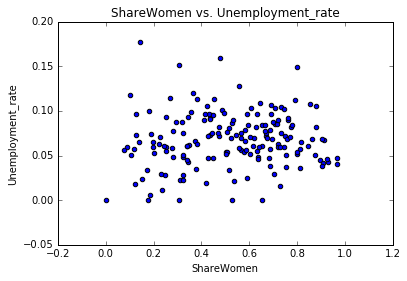

In [10]:


recent_grads.plot(x='ShareWomen',y="Unemployment_rate", kind="scatter", title="ShareWomen vs. Unemployment_rate")

#### Relation between `Men` and `Median`

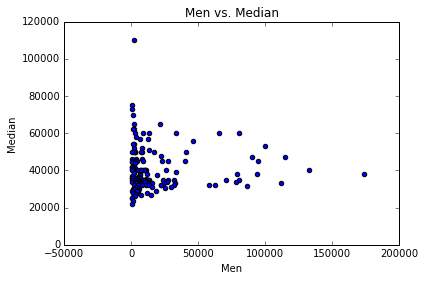

In [11]:
recent_grads.plot(x='Men',y="Median", kind="scatter", title="Men vs. Median")

#### Relation between `Women` and `Median`

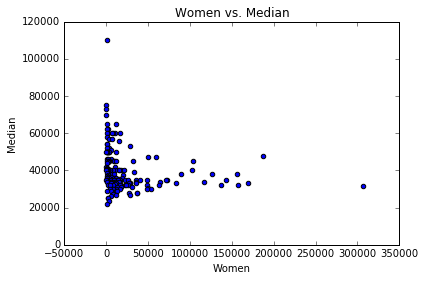

In [12]:
recent_grads.plot(x='Women',y="Median", kind="scatter", title="Women vs. Median")

From the above scatter plots, it is not possible to explore more or decide and come to a conclusion.

### 3. Visualizing and exploring data - Histogram

#### Distribution of `Sample_size`

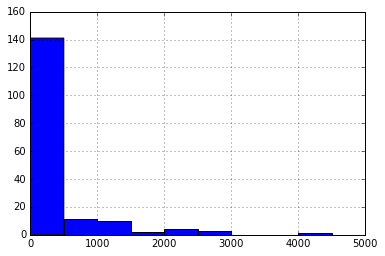

In [13]:
recent_grads['Sample_size'].hist(bins=10, range=(0,5000))

#### Distribution of `Median`

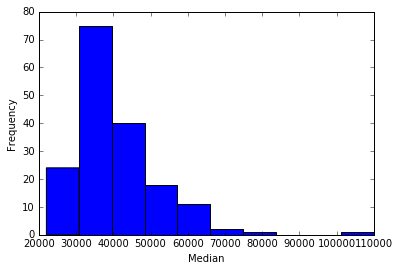

In [14]:
recent_grads['Median'].plot(kind='hist').set_xlabel("Median")

*** The most common median salary is between 30000 and 40000.*** We can confirm that using the `median()`

In [15]:
recent_grads["Median"].median()

36000.0

Median of salary in the dataframe from the above is clearly between 30000 and 40000. ***The most common median salary is 36000.***

#### Distribution of `Employed`

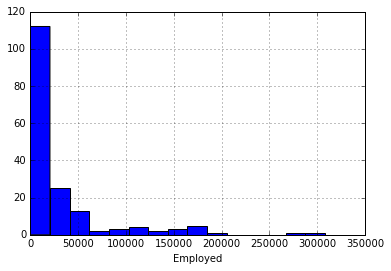

In [16]:
recent_grads['Employed'].hist(bins=15).set_xlabel('Employed')

#### Distribution of `Full_time`

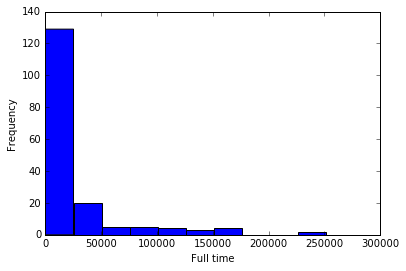

In [17]:
recent_grads['Full_time'].plot(kind='hist').set_xlabel('Full time')

#### Distribution of `ShareWomen`

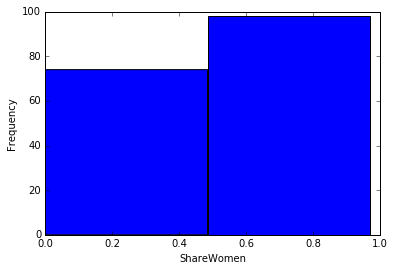

In [56]:
recent_grads['ShareWomen'].plot(kind='hist',bins=2).set_xlabel('ShareWomen')

In [57]:
recent_grads['ShareWomen'].value_counts(bins=2).sort_index()

(-0.0019690000000000003, 0.484]    74
(0.484, 0.969]                     98
Name: ShareWomen, dtype: int64

From the histogram and the figures as seen above, we see that more than 50% ie, 98 of the 172 majors have majority Women students.

#### Distribution of `Unemployment_rate`

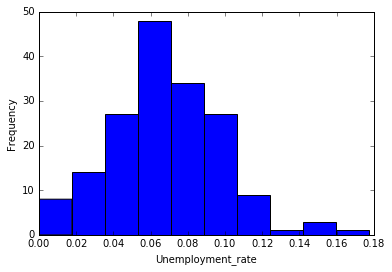

In [20]:
recent_grads['Unemployment_rate'].plot(kind='hist').set_xlabel('Unemployment_rate')

#### Distribution of `Men`

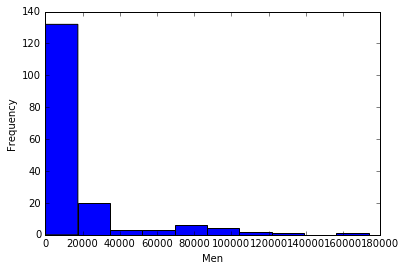

In [21]:
recent_grads['Men'].plot(kind='hist').set_xlabel('Men')

#### Distribution of `Women`

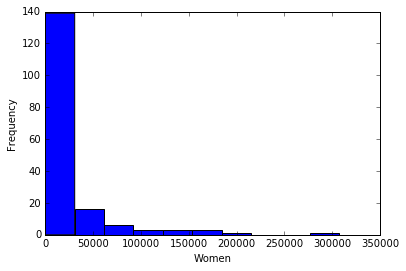

In [22]:
recent_grads['Women'].plot(kind='hist').set_xlabel('Women')

### 4. Visualizing and exploring data - Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75149a5400>,
      dtype=object)

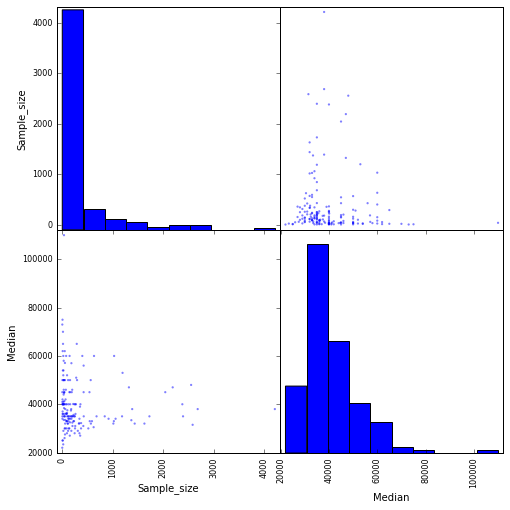

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7514796c50>,
      dtype=object)

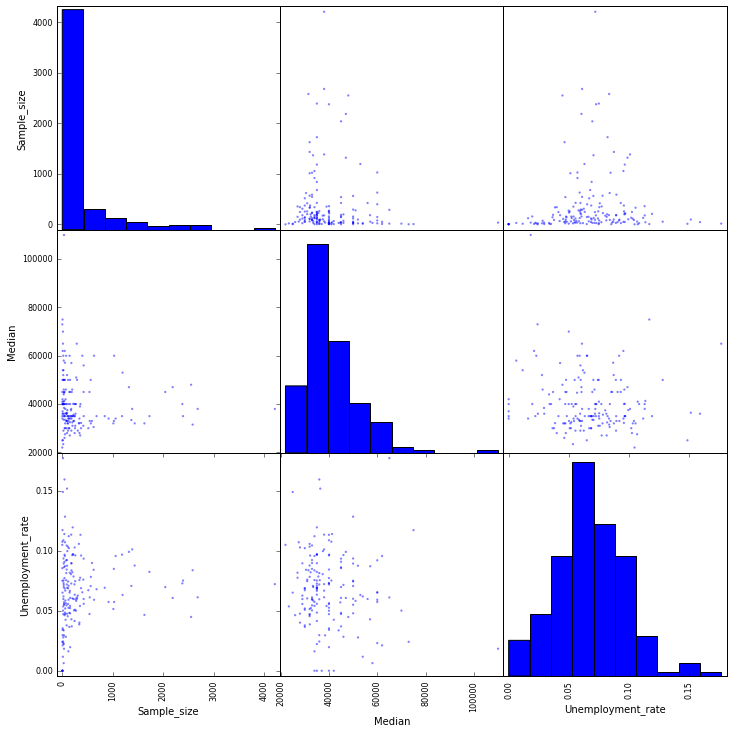

In [24]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7514473e80>,
      dtype=object)

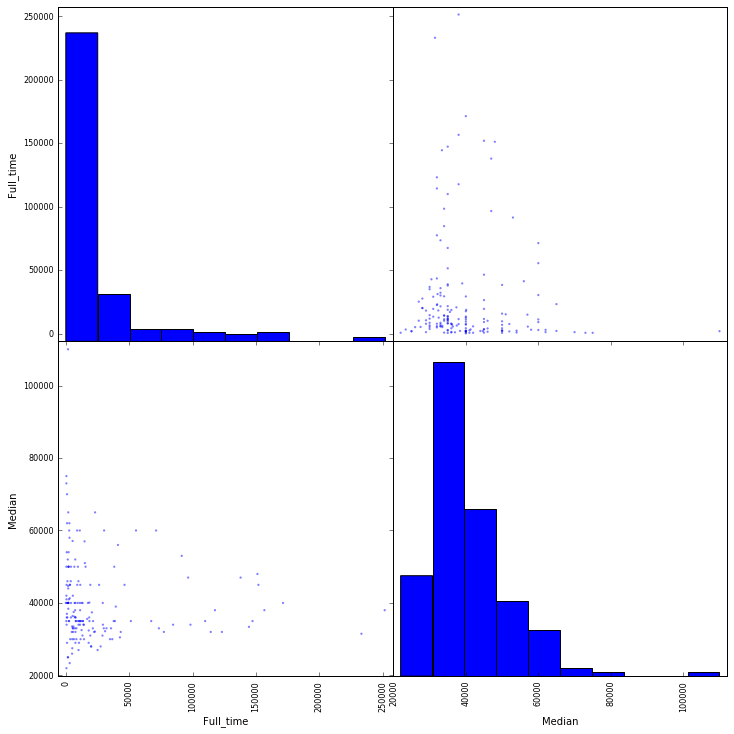

In [25]:
scatter_matrix(recent_grads[['Full_time','Median']],figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75142dc668>,
      dtype=object)

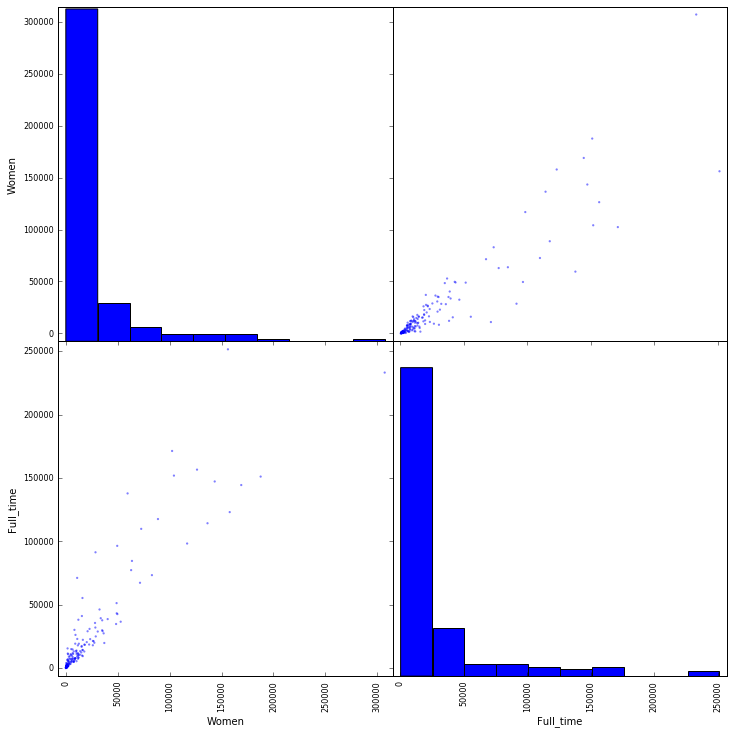

In [26]:
scatter_matrix(recent_grads[['Women','Full_time']],figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7514115668>,
      dtype=object)

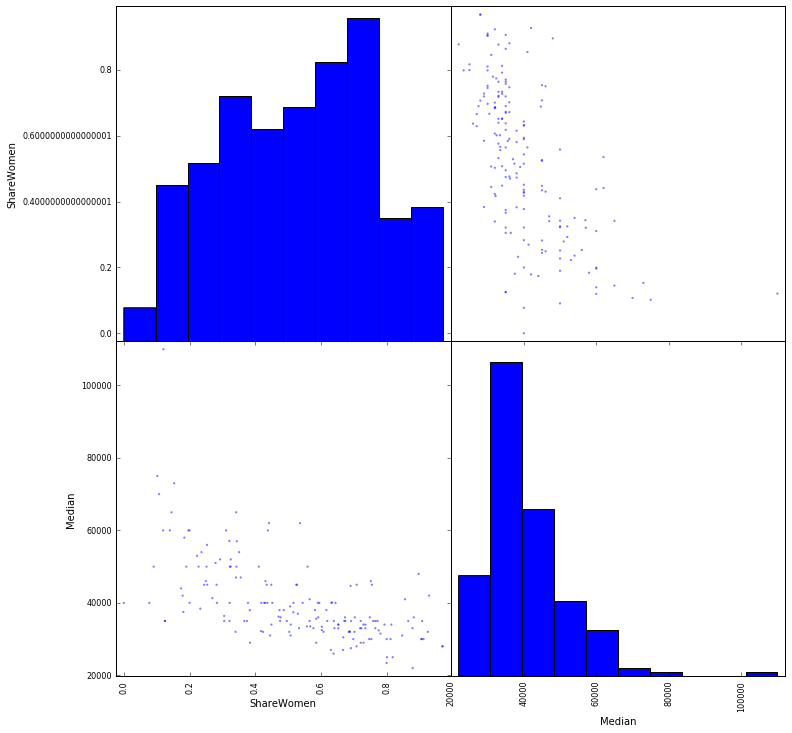

In [27]:
scatter_matrix(recent_grads[['ShareWomen','Median']],figsize=(12,12))

Clearly from the above scatter matrix, students who majored in subjects with majority female students did not make more money.

### 5. Visualising and exploring data - Bar plots

We are going to use bar plots to compare the percentages of women (`ShareWomen`) from the first ten rows and last ten rows, and also compare the unemployment rate (`Unemployment_rate`) from the first ten rows and last ten rows of the `recent_grads` dataframe.

#### `Major` vs. `ShareWomen`

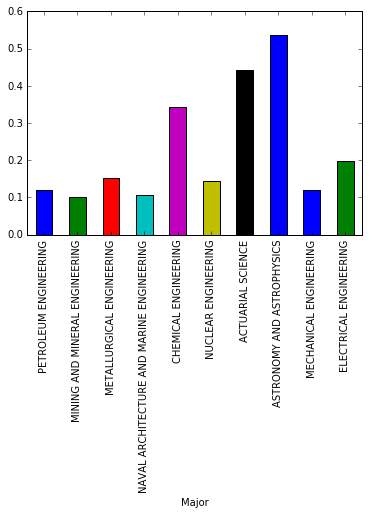

In [28]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)

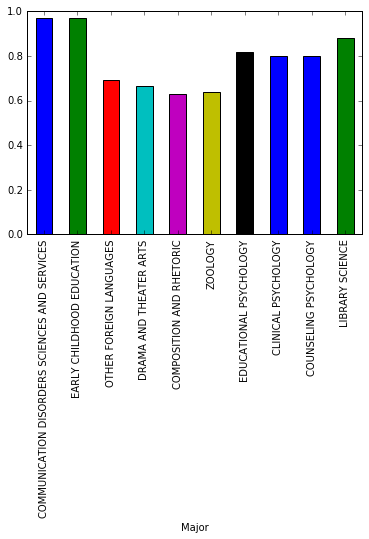

In [29]:
recent_grads.tail(10).plot.bar(x='Major', y='ShareWomen',legend=False)

The above bar plots show that Communication Disorders Sciences, ECE, majors related to Psychology and Library Science have the majority share of women students.

#### `Major` vs. `Unemployment rate`

In [30]:
# recent_grads.sort_values('Unemployment_rate',ascending=False)

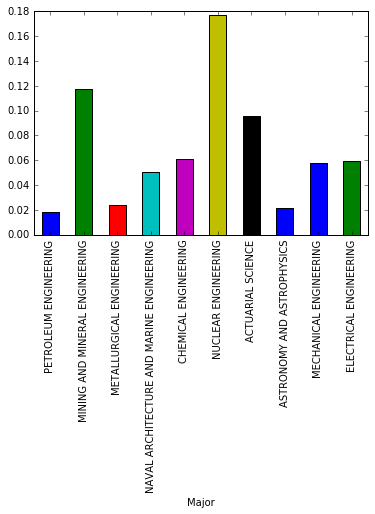

In [31]:
recent_grads.head(10).plot.bar(x='Major', y='Unemployment_rate',legend=False)

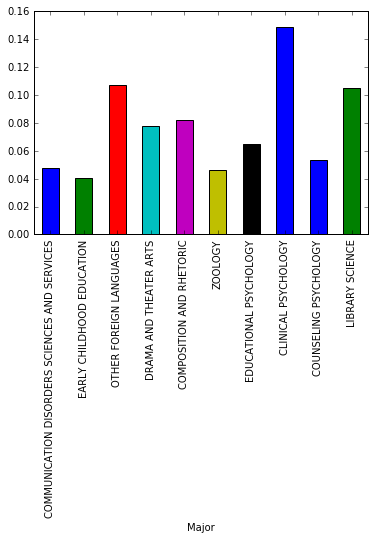

In [32]:
recent_grads.tail(10).plot.bar(x='Major', y='Unemployment_rate',legend=False)

We can see students who majored in Nuclear Engineering are mostly unemployed of all majors.

#### `Major` vs. `Median`

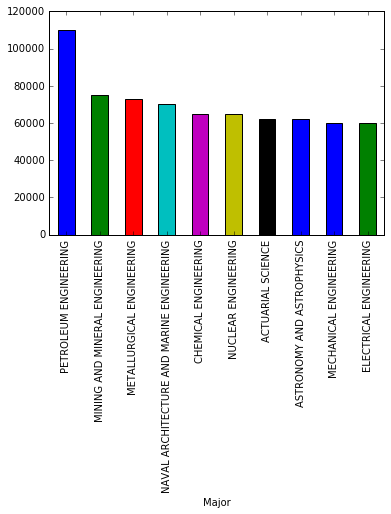

In [33]:

recent_grads[:10].plot.bar(x='Major', y='Median',legend=False)

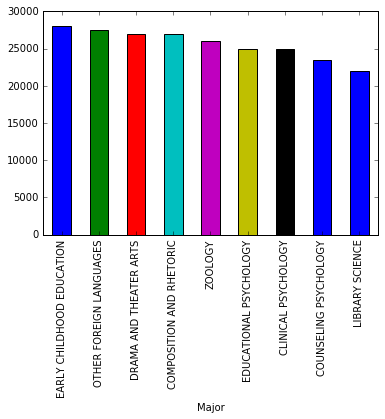

In [34]:
recent_grads[163:].plot.bar(x='Major', y='Median',legend=False)

Students who majored in Petroleum Engineering were drawing the highest median salary and the least paid being the Library Science category.

### 6. Exploring the data further


#### Comparing the number of men and women in each category

To compare the number of men and women in each category, we visualize the data using group bar plot.

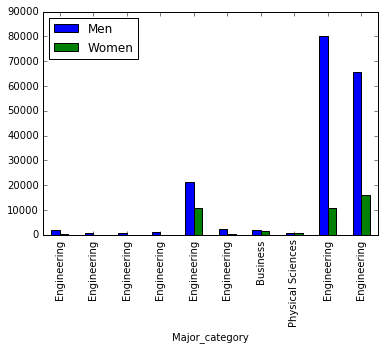

In [35]:

df = pd.DataFrame(recent_grads,columns=["Major_category","Men","Women"])
df.head(10).plot.bar(x = 'Major_category')



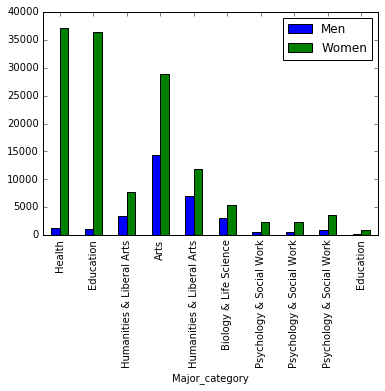

In [36]:
df.tail(10).plot.bar(x = 'Major_category')

Again,from the above plots we can see that the bottom 10 records in the datset have more women students mainly in the Health, Education , Arts, Education, Humanities and Social Work majors. From the top 10 records, Mechanical and Electrical engineering have the most number of men students. 

#### Median salaries and unemployment rate.

Using a box plot, let's visualize the distributions of median salaries and unemployment rate


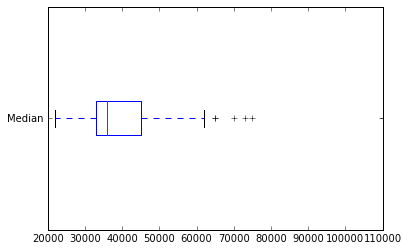

In [37]:
# df1  = pd.DataFrame(recent_grads,columns=["Median","Unemployment_rate"])
recent_grads['Median'].plot.box(vert=False)

As we observed earlier, again the median of salary in the dataframe from the above is between 30000 and 40000. Majority of the employed students earned salary between 30000 and 40000.

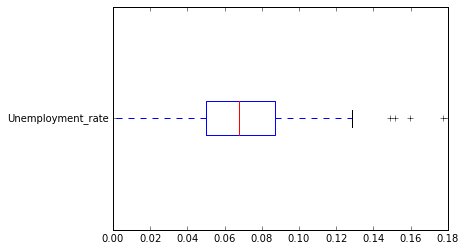

In [38]:
recent_grads['Unemployment_rate'].plot.box(vert=False)

The unemployment rates of the graduates is between 0 and 12% as seen from the above plot.

#### Hexagonal bin plot

Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually. Let's plot those scatter plots from earlier that had dense plots.

##### `Full_time` vs. `Median`

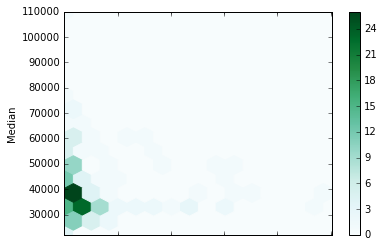

In [39]:
recent_grads.plot.hexbin(x='Full_time',y="Median", gridsize=15)

##### `Men` vs. `Median`

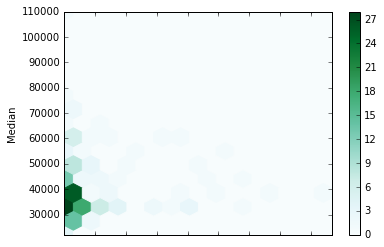

In [40]:
recent_grads.plot.hexbin(x='Men',y="Median", gridsize=15)

##### `Women` vs. `Median`

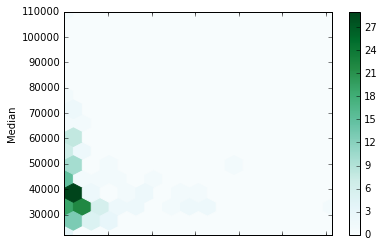

In [41]:
recent_grads.plot.hexbin(x='Women',y="Median", gridsize=15)

Again, we see that graduates who were employed full time earned salaries between 30000 and 40000.

##### `Sample_size` and `Unemployment_rate`

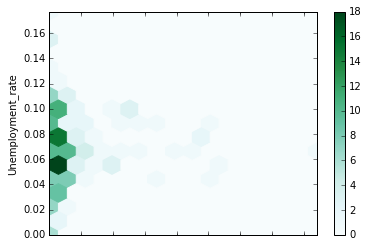

In [42]:
recent_grads.plot.hexbin(x='Sample_size',y="Unemployment_rate", gridsize=15)

The mean unemployment rate is approx. 6% including all the majors in the dataset. We can verify the same using  `describe()`

In [43]:
recent_grads["Unemployment_rate"].describe()

count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: Unemployment_rate, dtype: float64

### Conclusion

In this project, we used pandas plotting tools to explore data on job outcomes of recent graduates. We observed the following from our analysis:

* The graduates who were employed full-time earned an average salary between 30000 and 40000.
* Majority of the women students enrolled in Health Sciences, Psychology and Social Work, Education and Humanities & Arts majors while men preferred Engineering majors.
* Almost 6% of the graduates are umemployed, irrespective of the major category.
